In [2]:
!pip install pandas


  Using cached https://files.pythonhosted.org/packages/4f/a4/879454d49688e2fad93e59d7d4efda580b783c745fd2ec2a3adf87b0808d/pytz-2020.1-py2.py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
dataset=pd.read_csv("Weather.csv")

In [28]:
dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


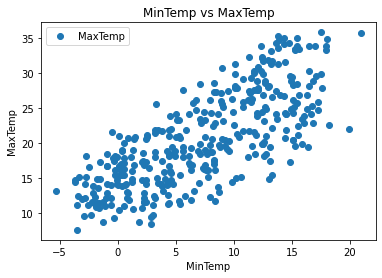

In [21]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [34]:
X = dataset['MinTemp'].values.reshape(-1,1)
#X=X.reshape(366,1)
#X

y = dataset['MaxTemp'].values.reshape(-1,1)

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
reg=LinearRegression()

In [37]:
reg.fit(X_train,Y_train)###Training Algorithm

LinearRegression()

In [39]:
y_pred = reg.predict(X_test)

In [40]:
y_pred

array([[23.41302965],
       [13.08685652],
       [27.26485614],
       [25.46187353],
       [26.93704112],
       [20.0529257 ],
       [29.31370001],
       [13.82444032],
       [17.43040554],
       [19.56120317],
       [20.87246325],
       [25.21601226],
       [16.44696048],
       [16.44696048],
       [13.33271779],
       [16.36500672],
       [16.52891423],
       [22.01981582],
       [20.62660198],
       [23.98670594],
       [24.06865969],
       [18.08603558],
       [27.18290238],
       [14.56202411],
       [14.3981166 ],
       [12.43122648],
       [28.08439369],
       [26.36336483],
       [24.970151  ],
       [15.79133044],
       [22.83935337],
       [21.85590831],
       [24.72428973],
       [28.08439369],
       [23.82279843],
       [19.64315692],
       [25.8716423 ],
       [25.46187353],
       [12.7590415 ],
       [28.2483012 ],
       [14.31616285],
       [14.97179289],
       [13.82444032],
       [15.62742293],
       [27.10094863],
       [17

In [42]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


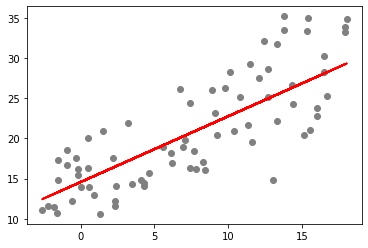

In [44]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()